In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap
shap.initjs()


In [15]:
df = pd.read_csv('Dataset_analyse.csv')

In [16]:
df.head()

,raw_title,year,month,day,director,casting,distributor,country,duration,genre,...,entree_annee,actor_list,classification_country,distributor_combined_score,year_combined_score,country_combined_score,total_actor_scores,season,month_name,is_holiday
0,Bienvenue chez les Ch'tis,2008,2,27,"""dany boon""","[""kad merad"", ""dany boon"", ""zoe felix""]","[""pathe renn productions"", ""hirsch"", ""les prod...",france,6360,comedie,...,190.3,"['""kad merad""', ' ""dany boon""', ' ""zoe felix""']",2,0.552991,0.830920,0.716108,0.557049,winter,february,0
1,Les Bronzés 3: Amis pour la vie,2006,2,1,"""patrice leconte""","[""josiane balasko"", ""michel blanc"", ""marieanne...","[""les films christian fechner"", ""tf1 films pro...",france,5820,comedie,...,188.8,"['""josiane balasko""', ' ""michel blanc""', ' ""ma...",2,0.341350,0.855770,0.716108,0.529809,winter,february,0
2,Taxi 2,2000,3,29,"""gerard krawczyk""","[""samy naceri"", ""frederic diefenthal"", ""emma w...","[""arp selection"", ""canal"", ""leeloo productions""]",france,5400,comedie,...,165.8,"['""samy naceri""', ' ""frederic diefenthal""', ' ...",2,0.442529,0.758796,0.716108,0.454720,spring,march,0
3,La Revanche des Sith,2005,5,18,"""george lucas""","[""hayden christensen"", ""natalie portman"", ""ewa...","[""lucasfilm"", ""mestiere cinema"", ""pandora films""]",etatsunis,8760,fantasy,...,175.6,"['""hayden christensen""', ' ""natalie portman""',...",3,0.443869,0.816782,0.918321,0.967593,spring,may,0
4,Le Roi Lion (2019),2019,7,17,"""jon favreau""","[""donald glover"", ""beyonce"", ""seth rogen""]","[""walt disney pictures"", ""fairview entertainme...",etatsunis,7080,aventure action,...,213.2,"['""donald glover""', ' ""beyonce""', ' ""seth roge...",3,0.445801,0.826926,0.918321,0.524373,summer,july,1


# Vision Macro

In [17]:
df.columns

Index(['raw_title', 'year', 'month', 'day', 'director', 'casting',
       'distributor', 'country', 'duration', 'genre', 'first_day',
       'first_week', 'first_weekend', 'hebdo_rank', 'total_spectator',
       'copies', 'rating_press', 'budget', 'lang', 'award',
       'director_combined_score', 'entree_annee', 'actor_list',
       'classification_country', 'distributor_combined_score',
       'year_combined_score', 'country_combined_score', 'total_actor_scores',
       'season', 'month_name', 'is_holiday'],
      dtype='object')

In [18]:
df.dtypes

raw_title                      object
year                            int64
month                           int64
day                             int64
director                       object
casting                        object
distributor                    object
country                        object
duration                        int64
genre                          object
first_day                     float64
first_week                      int64
first_weekend                 float64
hebdo_rank                      int64
total_spectator                 int64
copies                          int64
rating_press                  float64
budget                        float64
lang                           object
award                           int64
director_combined_score       float64
entree_annee                  float64
actor_list                     object
classification_country          int64
distributor_combined_score    float64
year_combined_score           float64
country_comb

# Country

In [19]:
# denombrage du nombre de films par pays 

resultat = df.country.value_counts()
print(resultat)

country
etatsunis          1344
france             1089
grandebretagne       90
canada               19
allemagne            17
japon                16
espagne              12
chine                10
australie            10
belgique             10
italie               10
irlande               6
danemark              6
coree du sud          4
russie                4
autriche              3
suede                 3
afrique du sud        2
indonesie             2
iran                  1
maroc                 1
islande               1
chili                 1
portugal              1
turquie               1
arabie saoudite       1
ukraine               1
hongrie               1
bresil                1
argentine             1
roumanie              1
liban                 1
luxembourg            1
suisse                1
mexique               1
Name: count, dtype: int64


In [20]:
# Encodage des pays 

country = ['etatsunis', 'france', 'grandebretagne', 'canada', 'espagne', 'japon', 'chine', 'allemagne', 'italie', 'australie', 'belgique',
           'danemark', 'nouvellezelande', 'irlande', 'bresil', 'mexique', 'suisse', 'autriche', 'argentine', 'taiwan', 'serbie']


label_encoder = LabelEncoder()

col_country = label_encoder.fit_transform(df['country'])

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
# col_country = pd.get_dummies(df['country'])

# Affichons le résultat
col_country

array([15, 15, 15, ..., 22, 15, 22])

# Langue

In [21]:
# étude différentes langues d'origine ou de traduction
resultat = df.lang.value_counts()
resultat

lang
["anglais"]                                                   765
["francais"]                                                  716
["anglais", "espagnol"]                                       116
["francais", "anglais"]                                        92
["anglais", "francais"]                                        65
                                                             ... 
["anglais", "allemand", "italien", "mandarin", "espagnol"]      1
["francais", "anglais", "allemand", "espagnol"]                 1
["anglais", "latin", "francais"]                                1
["anglais", "gaelique", "allemand"]                             1
["italien", "anglais"]                                          1
Name: count, Length: 553, dtype: int64

# Réalisateur

In [22]:
# étude réalisateur, directeur du film 

resultat = df.director.value_counts()
resultat

director
"woody allen"               14
"ridley scott"              12
"clint eastwood"            11
"steven spielberg"          11
"luc besson"                10
                            ..
"florence moncorgegabin"     1
"caroline vignal"            1
"henry selick"               1
"tamra davis"                1
"paolo virzi"                1
Name: count, Length: 1501, dtype: int64

In [23]:
# Analyse du réalisateur le plus popualire dans notre dataset

director = df[df['director'] == 'woody allen']
print(director)

Empty DataFrame
Columns: [raw_title, year, month, day, director, casting, distributor, country, duration, genre, first_day, first_week, first_weekend, hebdo_rank, total_spectator, copies, rating_press, budget, lang, award, director_combined_score, entree_annee, actor_list, classification_country, distributor_combined_score, year_combined_score, country_combined_score, total_actor_scores, season, month_name, is_holiday]
Index: []

[0 rows x 31 columns]


# Genre

In [24]:
# étude du genre 

resultat = df.genre.value_counts()
print(resultat)

genre
comedie               695
drame                 443
thriller              300
aventure action       268
animation             187
comedie dramatique    184
horreur               104
science fiction        99
romance                95
film familial          85
fantasy                74
comicbook              51
documentaire           23
musical                22
guerre                 17
western                12
catastrophe             8
peplum                  6
Name: count, dtype: int64


In [25]:
# encodage des principaux genres de films 

genre = ['comedie', 'drame', 'thriller', 'aventure action', 'comedie dramatique', 'science fiction', 'romance', 'fantasy', 'animation', 'comicbook', 'film familial',
            'horreur', 'guerre', 'western', 'musical', 'documentaire', 'peplum', 'catastrophe', 'courmetrage']

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
col_genre = pd.get_dummies(df['genre'])

# Affichons le résultat
col_genre 

,animation,aventure action,catastrophe,comedie,comedie dramatique,comicbook,documentaire,drame,fantasy,film familial,guerre,horreur,musical,peplum,romance,science fiction,thriller,western
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2669,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2670,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2671,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Matrice de correlation 

In [26]:
sns.set_theme(style='white')

# Calculer matrice de correlation 
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Affichage de couleur 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Générer matrice de correlation
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths= .5, cbar_kws={"shrink": .5})

ValueError: could not convert string to float: "Bienvenue chez les Ch'tis"

array([[<Axes: xlabel='total_spectator', ylabel='total_spectator'>,
        <Axes: xlabel='rating_public', ylabel='total_spectator'>,
        <Axes: xlabel='award', ylabel='total_spectator'>,
        <Axes: xlabel='copies', ylabel='total_spectator'>,
        <Axes: xlabel='budget', ylabel='total_spectator'>],
       [<Axes: xlabel='total_spectator', ylabel='rating_public'>,
        <Axes: xlabel='rating_public', ylabel='rating_public'>,
        <Axes: xlabel='award', ylabel='rating_public'>,
        <Axes: xlabel='copies', ylabel='rating_public'>,
        <Axes: xlabel='budget', ylabel='rating_public'>],
       [<Axes: xlabel='total_spectator', ylabel='award'>,
        <Axes: xlabel='rating_public', ylabel='award'>,
        <Axes: xlabel='award', ylabel='award'>,
        <Axes: xlabel='copies', ylabel='award'>,
        <Axes: xlabel='budget', ylabel='award'>],
       [<Axes: xlabel='total_spectator', ylabel='copies'>,
        <Axes: xlabel='rating_public', ylabel='copies'>,
        <Ax

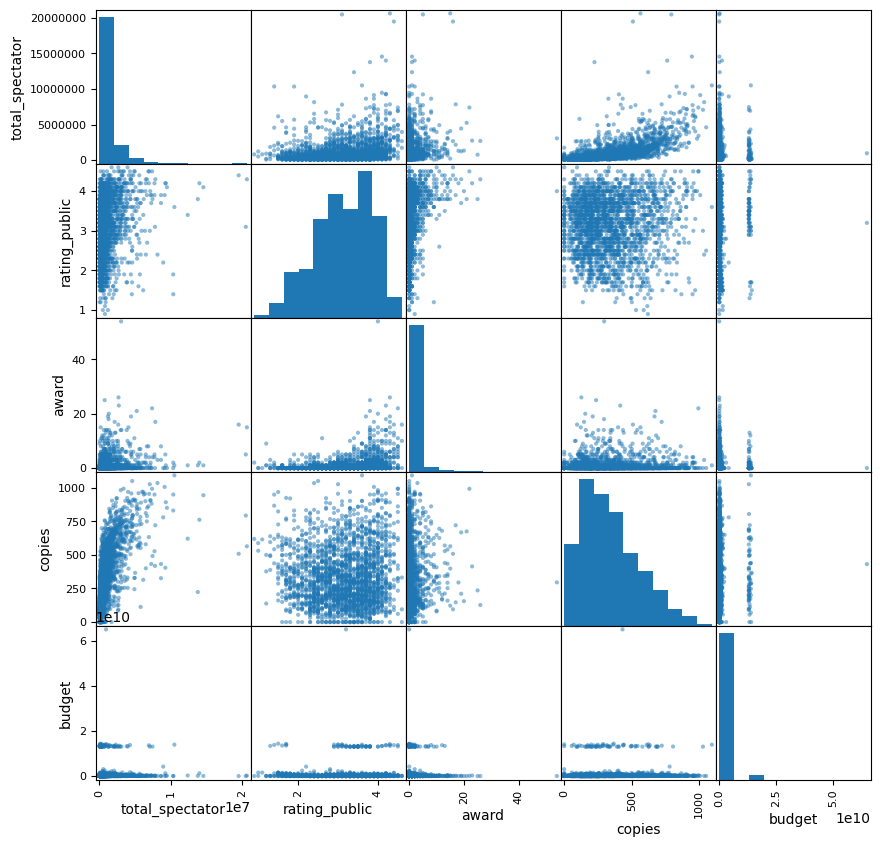

In [ ]:
features  = df[['total_spectator', 'rating_public', 'award', 'copies', 'budget', '']]

scatter_matrix(features, figsize=(10,10))

# Budget

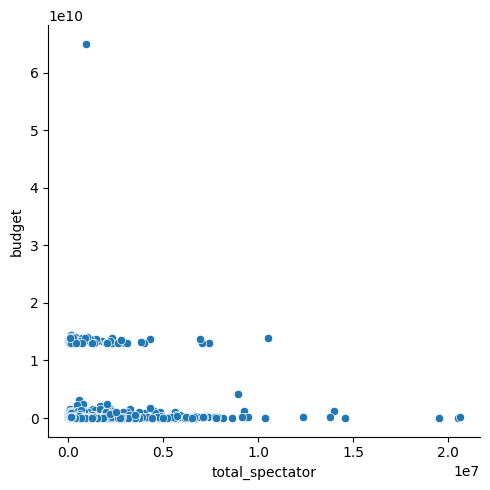

In [ ]:
sns.relplot(x="total_spectator", y="budget", data=df,
            kind="scatter")
plt.show()

# Award

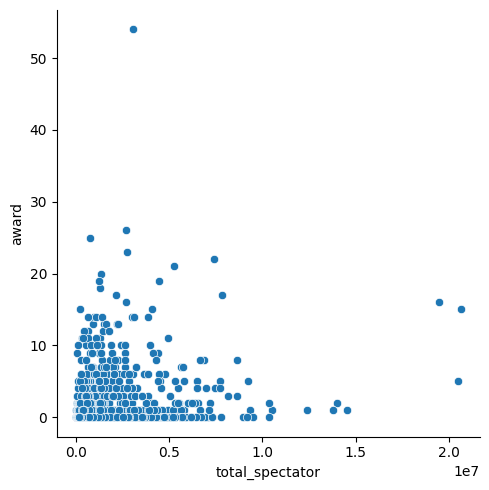

In [ ]:
sns.relplot(x="total_spectator", y="award", data=df,
            kind="scatter")
plt.show()

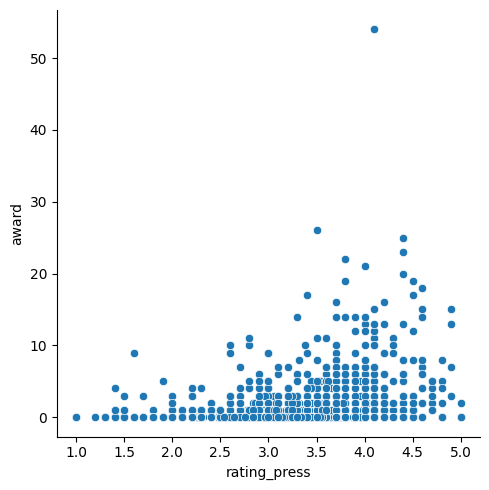

In [ ]:
sns.relplot(x="rating_press", y="award", data=df,
            kind="scatter")
plt.show()

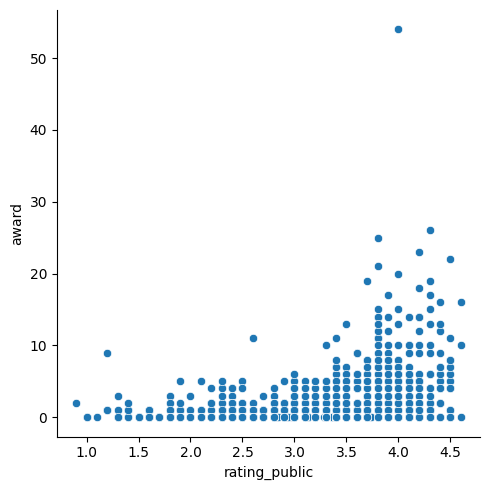

In [ ]:
sns.relplot(x="rating_public", y="award", data=df,
            kind="scatter")
plt.show()

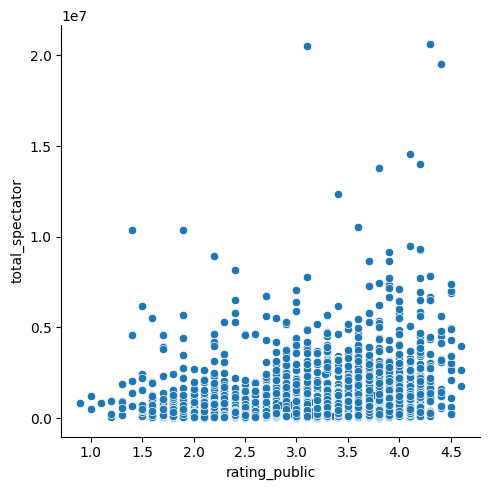

In [ ]:
sns.relplot(x="rating_public", y="total_spectator", data=df,
            kind="scatter")
plt.show()

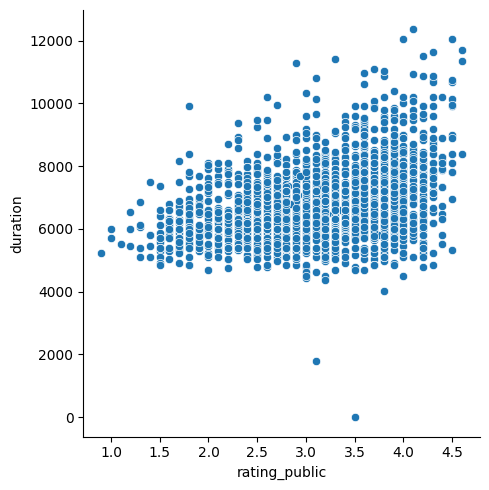

In [ ]:
sns.relplot(x="rating_public", y="duration", data=df,
            kind="scatter")
plt.show()

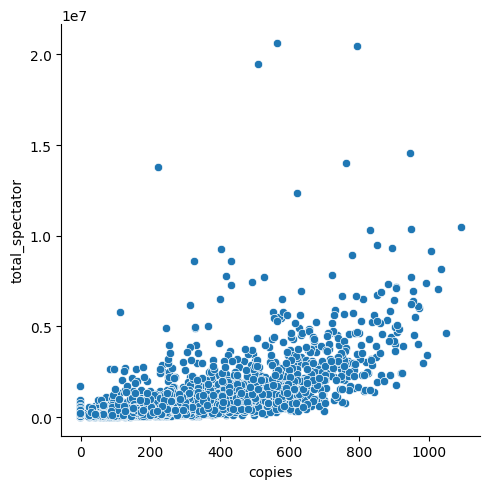

In [ ]:
sns.relplot(x="copies", y="total_spectator", data=df,
            kind="scatter")
plt.show()

# Shap Values

### Model

In [27]:
from joblib import dump, load

model_path = 'model.pkl'
model = load('model.pkl')

In [28]:
model.predict

<bound method Pipeline.predict of Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('categorical',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False)),
                                                                                   ('robustscaler',
                                                                                    RobustScaler(with_centering=False))]),
                                                                   ['genre',
                                                                    'season']),
                                                                  ('numeric

In [29]:
X = df.drop(['first_week'], axis=1)
y = df.first_week

### Standard SHAP values 

In [30]:
model[-1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
#get shap values
explainer = shap.TreeExplainer(model[-1])
X_tr = model[:-1].fit_transform(X)
shap_values = explainer(X_tr)

In [39]:
df.columns

Index(['raw_title', 'year', 'month', 'day', 'director', 'casting',
       'distributor', 'country', 'duration', 'genre', 'first_day',
       'first_week', 'first_weekend', 'hebdo_rank', 'total_spectator',
       'copies', 'rating_press', 'budget', 'lang', 'award',
       'director_combined_score', 'entree_annee', 'actor_list',
       'classification_country', 'distributor_combined_score',
       'year_combined_score', 'country_combined_score', 'total_actor_scores',
       'season', 'month_name', 'is_holiday'],
      dtype='object')

In [32]:
np.shape(shap_values.values)

(2673, 32)

### Waterfall plot 

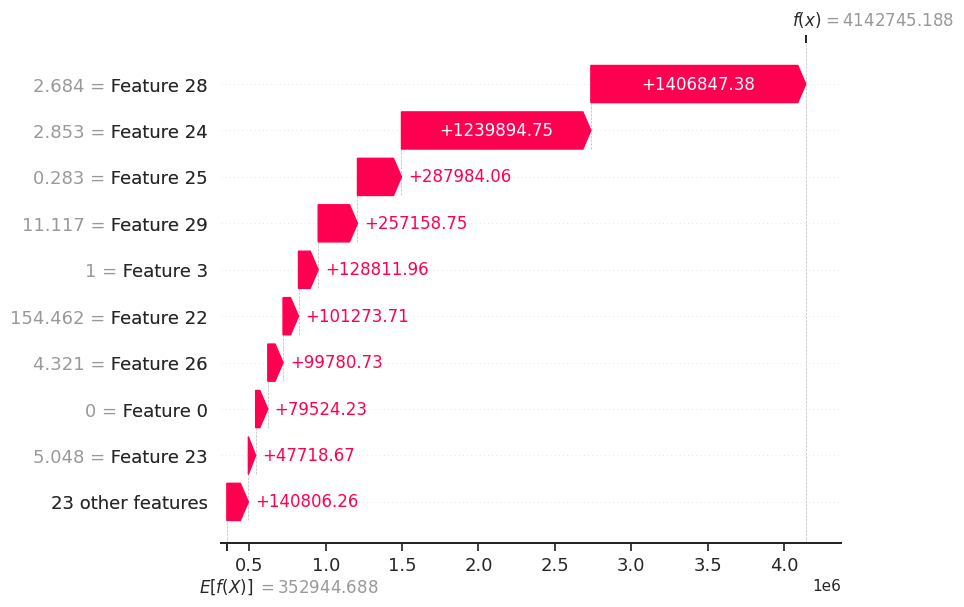

In [46]:
selected_features = ['raw_title', 'year', 'month', 'day', 'director', 'casting',
       'distributor', 'country', 'duration', 'genre', 'first_day',
       'first_week', 'first_weekend', 'hebdo_rank', 'total_spectator',
       'copies', 'rating_press', 'budget', 'lang', 'award',
       'director_combined_score', 'entree_annee', 'actor_list',
       'classification_country', 'distributor_combined_score',
       'year_combined_score', 'country_combined_score', 'total_actor_scores',
       'season', 'month_name', 'is_holiday']

shap.plots.waterfall(shap_values[0]) #features=df[selected_features].iloc[0], feature_names=selected_features)

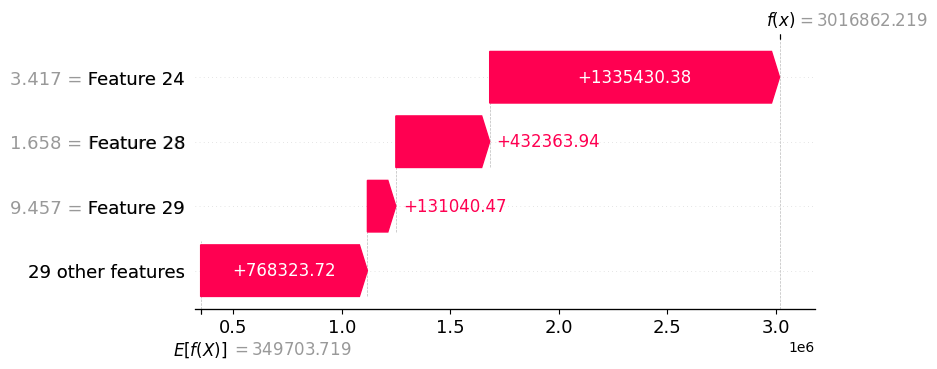

In [ ]:
shap.plots.waterfall(shap_values[1], max_display=4)

### SHAP for binary target variables

In [34]:
y_bin = [1 if y_>10 else 0 for y_ in y]

In [47]:
model_bin = xgb.XGBClassifier(objective='binary:logistic')
model_bin.fit(X, y_bin)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [48]:
explainer = shap.Explainer(model_bin)
shap_values_bin = explainer(X_tr)

shap.plots.waterfall(shap_values_bin[X])

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Force plot

In [ ]:
shap.plots.force(shap_values[0])

### Stacked force plot 

In [ ]:
shap.plots.force(shap_values[0:1000])

### Absolute Mean SHAP

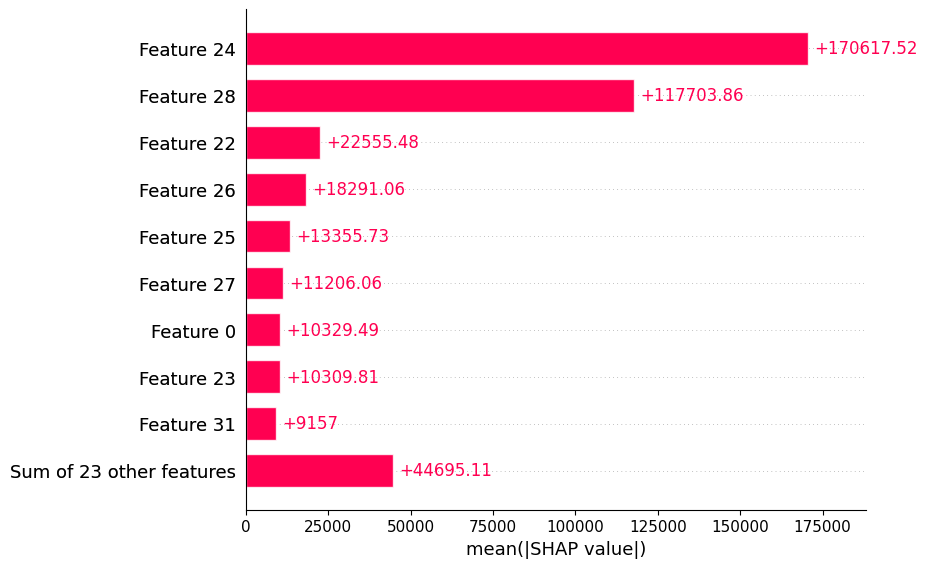

In [ ]:
shap.plots.bar(shap_values)

### Beeswarm plot

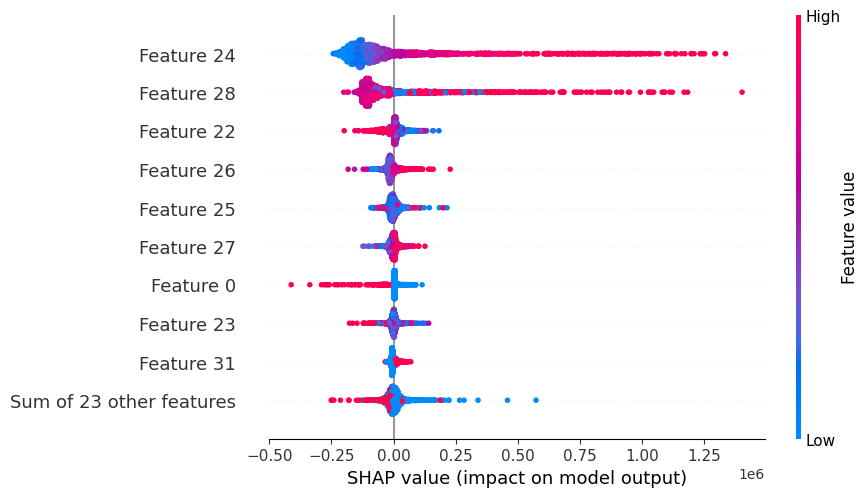

In [ ]:
shap.plots.beeswarm(shap_values)

### Dependance plots

In [ ]:
shap.plots.scatter(shap_values[])

TypeError: object of type 'NoneType' has no len()

In [ ]:
shap.plots.scatter(shap_values[:, 0], color=shap_values[:,''])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
shap.plots.scatter(shap_values[:,''])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Custom Plots 

In [38]:
shap_values

.values =
array([[ 7.9524227e+04, -2.8890133e+01,  1.8309575e+02, ...,
         2.5715875e+05,  2.2688129e+04, -4.0620308e+03],
       [ 4.5015215e+04,  1.2860627e+03, -1.6906265e+02, ...,
         7.1662586e+04,  2.8315806e+03, -6.1309473e+02],
       [ 4.8114387e+04, -2.1522004e+03,  2.5860474e+02, ...,
        -3.0163855e+04,  1.8032609e+04, -4.5577725e+03],
       ...,
       [ 3.8963423e+03,  1.0998068e+02, -2.4245163e+02, ...,
         3.4907249e+03, -1.1181271e+04, -5.4268184e+03],
       [ 3.4928989e+03,  4.0080045e+02, -7.3641914e+01, ...,
         5.3414040e+01, -3.5998347e+03, -2.9737522e+03],
       [ 4.0189556e+03, -8.1886375e+01, -9.9322075e+01, ...,
         3.4879651e+02, -6.2105933e+03, -3.6898589e+03]], dtype=float32)

.base_values =
array([352944.7, 352944.7, 352944.7, ..., 352944.7, 352944.7, 352944.7],
      dtype=float32)

.data =
array([[ 0.        ,  0.        ,  0.        , ..., 11.11652085,
         3.54135212,  0.        ],
       [ 0.        ,  0.        ,  

In [37]:
np.shape(shap_values.values)

(2673, 32)